In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
#Cargamos imagenes y etiquetas
# load numpy array from npy file
from numpy import load
# load array
X = load('/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/Valores flores.npy')
# print the array
print(X.shape)
y = load('/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/Etiquetas.npy')
# print the array
print(y.shape)

(9341, 100, 100, 3)
(9341,)


In [ ]:
#Creamos las etiquetas

print("Cantidad etiquetas creadas: ",len(y))

Cantidad etiquetas creadas:  9341


In [ ]:
#Cargamos imágenes
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores aumetadas')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)

            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirectorios:',sum(dircount))
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

leyendo imagenes de  /content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores aumetadas/
/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores aumetadas/narciso 1
/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores aumetadas/pensamiento 547
/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores aumetadas/lirio 551
/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores aumetadas/primula 551
/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores aumetadas/pie_de_potro 552
/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores aumetadas/azafran 548
/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores aumetadas/margarita 549
/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores aumetadas/tulipan 553
/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores aumetadas/flor_de_viento 546
/content/drive/MyDrive/archive.zip (Unzipped Files)/Red 

In [ ]:
'''from numpy import asarray
from numpy import savez_compressed
data=asarray(X)
savez_compressed('datasss.npz',data)'''

"from numpy import asarray\nfrom numpy import savez_compressed\ndata=asarray(X)\nsavez_compressed('datasss.npz',data)"

In [ ]:

classes = np.unique(y)
nClasses = len(classes)
print('Total de npumero de salidad: ', nClasses)

print('Salida de cada clase : ', classes)

Total de npumero de salidad:  17
Salida de cada clase :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [ ]:
#Dividimos los datos en datos de entrenamiento y testeo
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Forma de los datos de entrenamiento: ', train_X.shape, train_Y.shape)
print('Forma de los datos de prueba : ', test_X.shape, test_Y.shape)

Forma de los datos de entrenamiento:  (7472, 100, 100, 3) (7472,)
Forma de los datos de prueba :  (1869, 100, 100, 3) (1869,)


Text(0.5, 1.0, 'Clase : 15')

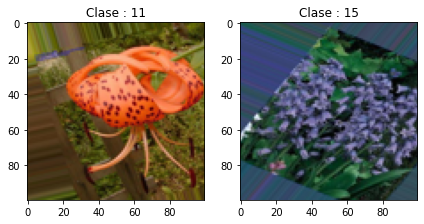

In [ ]:
#Graficamos la primera imagen de testeo y entrenamiento
plt.figure(figsize=[7,7])


plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Clase : {}".format(train_Y[0]))


plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Clase : {}".format(test_Y[0]))

In [ ]:
#Normalizamos
'''train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.'''
print(X[2])

[[[0.41568628 0.58431375 0.5372549 ]
  [0.39607844 0.5568628  0.4392157 ]
  [0.45490196 0.6039216  0.43529412]
  ...
  [0.4117647  0.6039216  0.40784314]
  [0.48235294 0.6745098  0.4509804 ]
  [0.45490196 0.6627451  0.38039216]]

 [[0.40392157 0.5803922  0.4862745 ]
  [0.3764706  0.54509807 0.39607844]
  [0.41568628 0.5686275  0.39215687]
  ...
  [0.4392157  0.6117647  0.4392157 ]
  [0.4862745  0.6627451  0.48235294]
  [0.46666667 0.6509804  0.4117647 ]]

 [[0.3882353  0.57254905 0.43137255]
  [0.3647059  0.5372549  0.3529412 ]
  [0.4117647  0.5647059  0.38431373]
  ...
  [0.4627451  0.62352943 0.44313726]
  [0.53333336 0.6901961  0.5176471 ]
  [0.49411765 0.6627451  0.43529412]]

 ...

 [[0.3372549  0.50980395 0.40784314]
  [0.3764706  0.5529412  0.43529412]
  [0.44705883 0.61960787 0.49411765]
  ...
  [0.42745098 0.45490196 0.23137255]
  [0.4        0.44313726 0.23921569]
  [0.47843137 0.52156866 0.3529412 ]]

 [[0.34901962 0.52156866 0.41960785]
  [0.39607844 0.5686275  0.47058824]


In [ ]:
# Cambiamos las etiquetas a one-hot encondig
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


print('Etiqueta original:', train_Y[0])
print('Etiqueta en one-hot:', train_Y_one_hot[0])

Etiqueta original: 11
Etiqueta en one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#Crear los grupos de entrenamiento y validación
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)

In [ ]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(6724, 100, 100, 3) (748, 100, 100, 3) (6724, 17) (748, 17)


In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = .008 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 70 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 30 # cantidad de imágenes que se toman a la vez en memoria

In [ ]:
flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))

flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))

flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))

flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))

flower_model.add(Flatten())
flower_model.add(Dense(512, activation='relu'))
flower_model.add(Dropout(0.25))

flower_model.add(Dense(nClasses, activation='softmax'))

In [ ]:

flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])

In [ ]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/70
225/225 [==============================] - 36s 15ms/step - loss: 2.8256 - accuracy: 0.0698 - val_loss: 2.6099 - val_accuracy: 0.1511
Epoch 2/70
225/225 [==============================] - 3s 13ms/step - loss: 2.4305 - accuracy: 0.1678 - val_loss: 2.3722 - val_accuracy: 0.1872
Epoch 3/70
225/225 [==============================] - 3s 13ms/step - loss: 2.2532 - accuracy: 0.2148 - val_loss: 2.1978 - val_accuracy: 0.2834
Epoch 4/70
225/225 [==============================] - 3s 13ms/step - loss: 2.0855 - accuracy: 0.2810 - val_loss: 2.1412 - val_accuracy: 0.2634
Epoch 5/70
225/225 [==============================] - 3s 13ms/step - loss: 1.9154 - accuracy: 0.3448 - val_loss: 1.8918 - val_accuracy: 0.3636
Epoch 6/70
225/225 [==============================] - 3s 13ms/step - loss: 1.8010 - accuracy: 0.3748 - val_loss: 1.8197 - val_accuracy: 0.3797
Epoch 7/70
225/225 [==============================] - 3s 13ms/step - loss: 1.6660 - accuracy: 0.4205 - val_loss: 1.6912 - val_accuracy: 0.429

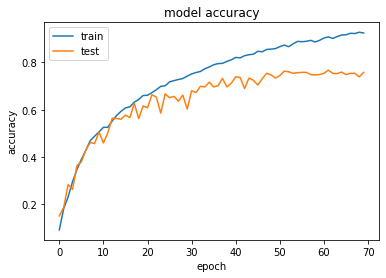

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

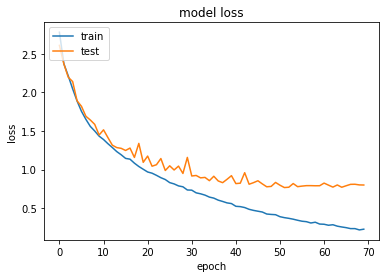

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

59/59 [==============================] - 0s 6ms/step - loss: 0.8469 - accuracy: 0.7426
El modelo predice el  74.26431179046631 % de los datos


In [ ]:
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

El modelo predice el  74.26431179046631 % de los datos


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest')#Generamos las características
img=Image.open('/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores/azafran/image_0321.jpg')
x = img_to_array(img)  # Lee la imagen como un areglo
x = x.reshape((1,) + x.shape)  # Redimencionamos el arreglo con una dimension mas
i = 0
#Generamos un ciclo que genere 5 imagenes de la original 
for batch in datagen.flow(x, batch_size=1,save_to_dir='/content/images', save_prefix=str(i), save_format='jpeg'):
  i += 1
  if i > 4:
    break 

FileNotFoundError: ignored

In [ ]:
s=plt.imread('/content/images/0_0_185.jpeg')
t=plt.imread('/content/images/0_0_4212.jpeg')
u=plt.imread('/content/images/0_0_4555.jpeg')
v=plt.imread('/content/images/0_0_7880.jpeg')
w=plt.imread('/content/images/0_0_8098.jpeg')
x=plt.imread('/content/drive/MyDrive/archive.zip (Unzipped Files)/Red flores/flores/azafran/image_0321.jpg')

fig = plt.figure(figsize=[2.7*6,2.7*3])

ax1 = fig.add_subplot(231)
ax1.imshow(x)

ax2 = fig.add_subplot(232)
ax2.imshow(s)
ax1 = fig.add_subplot(233)
ax1.imshow(t)

ax2 = fig.add_subplot(234)
ax2.imshow(u)
ax1 = fig.add_subplot(235)
ax1.imshow(v)

ax2 = fig.add_subplot(236)
ax2.imshow(w)
plt.show()


In [ ]:
from keras.models import model_from_json
# serializar el modelo a JSON
model_json = flower_model.to_json()
with open("modelflores.json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
flower_model.save_weights("pesosflores.h5")
print("Modelo Guardado!")
 

Modelo Guardado!


In [1]:
# cargar json y crear el modelo
json_file = open('modelflores.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# cargar pesos al nuevo modelo
loaded_model.load_weights("pesosflores.h5")
print("Cargado modelo desde disco.")
 
# Compilar modelo cargado y listo para usar.
loaded_model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
flower_model=loaded_model

FileNotFoundError: ignored

In [ ]:
test_eval = loaded_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

59/59 [==============================] - 1s 6ms/step - loss: 0.8831 - accuracy: 0.7409
El modelo predice el  74.26431179046631 % de los datos


In [ ]:
predictions = flower_model.predict(test_X)
print(np.argmax(predictions[11]),predictions[11])

8 [1.3143124e-04 1.2896971e-05 1.1531091e-04 2.1393962e-08 1.7597624e-06
 6.2538147e-02 7.2403685e-03 2.8121250e-04 8.7082350e-01 2.1763613e-02
 1.3283530e-09 4.0162433e-09 3.7057500e-02 9.9432512e-08 1.5799482e-09
 1.5070001e-06 3.2544915e-05]


(100, 100, 3)
La clase a que pertenece es:  [5]
La probabilidad de que pertenezca a cada clase es : [[1.1638733e-12 4.6911582e-02 3.6643818e-15 6.8004748e-21 4.6035725e-10
  9.5206094e-01 1.9707290e-11 5.6170207e-14 2.8098377e-14 6.1604653e-16
  2.5293485e-13 5.4903946e-12 1.0096846e-06 1.2473296e-13 7.5979518e-12
  1.0174568e-03 9.0103858e-06]]
La flor es un:  azafran


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


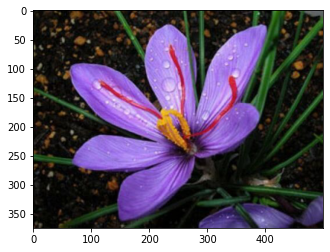

In [ ]:
image=Image.open('/content/azafran.jpg')
new_img = image.resize((100,100))#Redimencionamos todas las imagenes a un mismo tamaño
new_img.save('s.png','png')#Las guardamos
x = plt.imread('s.png')
print(x.shape)
x= np.expand_dims(x, axis=0)
y=flower_model.predict_classes(x)
y1=flower_model.predict(x)
print('La clase a que pertenece es: ',y)
print('La probabilidad de que pertenezca a cada clase es :',y1)
print('La flor es un: ',flores[y[0]])
plt.imshow(image)

In [ ]:
x= np.expand_dims(x, axis=0)

In [ ]:
y=flower_model.predict_classes(x)
y1=flower_model.predict(x)
print(y)
print(y1)
print(flores[y[0]])

[5]
[[1.1638733e-12 4.6911582e-02 3.6643818e-15 6.8004748e-21 4.6035725e-10
  9.5206094e-01 1.9707290e-11 5.6170207e-14 2.8098377e-14 6.1604653e-16
  2.5293485e-13 5.4903946e-12 1.0096846e-06 1.2473296e-13 7.5979518e-12
  1.0174568e-03 9.0103858e-06]]
azafran


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
